# Admissions 
#### Analyze graduate acceptance using R programming.
Bus471 Data Analytics; Illinois State University; Scott Schmidt

# View Data

In [1]:
install.packages("xlsx")
library("xlsx")
library(data.table)
library(caret)
library(gbm)
library(ggplot2)
options(warn=-1)

file='../input/admissions/admissions.xlsx'
df= read.xlsx(file, 1, header=TRUE)
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Loaded gbm 2.1.8



,admit,gre,gpa,rank
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [2]:
summary(df);

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

# Treat Missing Values

In [3]:
df <- na.omit(df)

# Acceptance Analysis

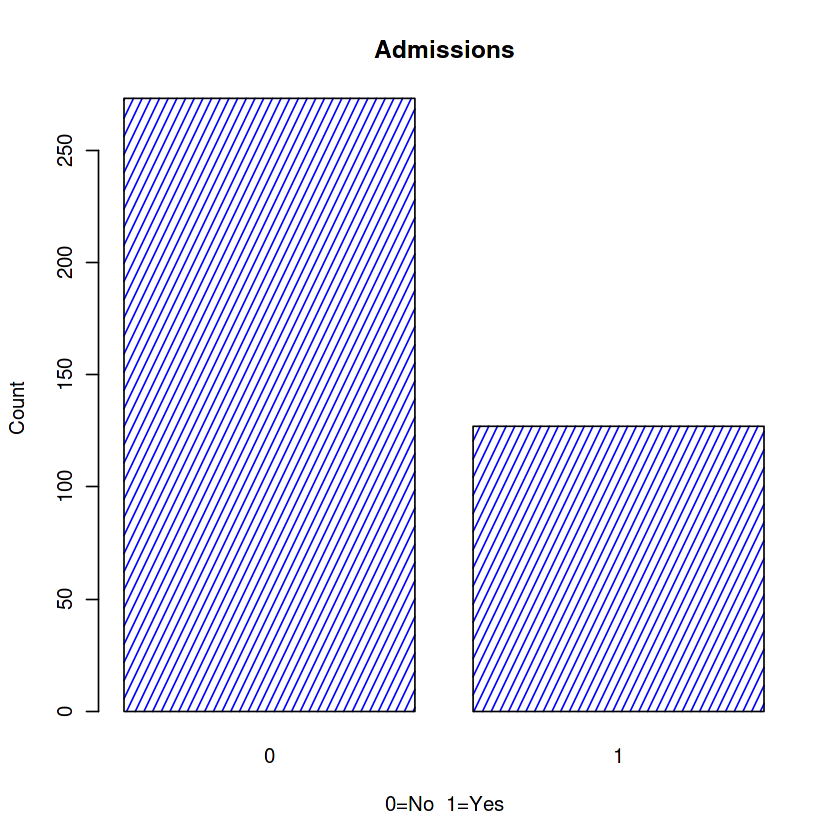

In [4]:
barplot(table(df$admit),
main="Admissions",
xlab="0=No  1=Yes",
ylab="Count",
border="black",
col="blue",
density=10
)

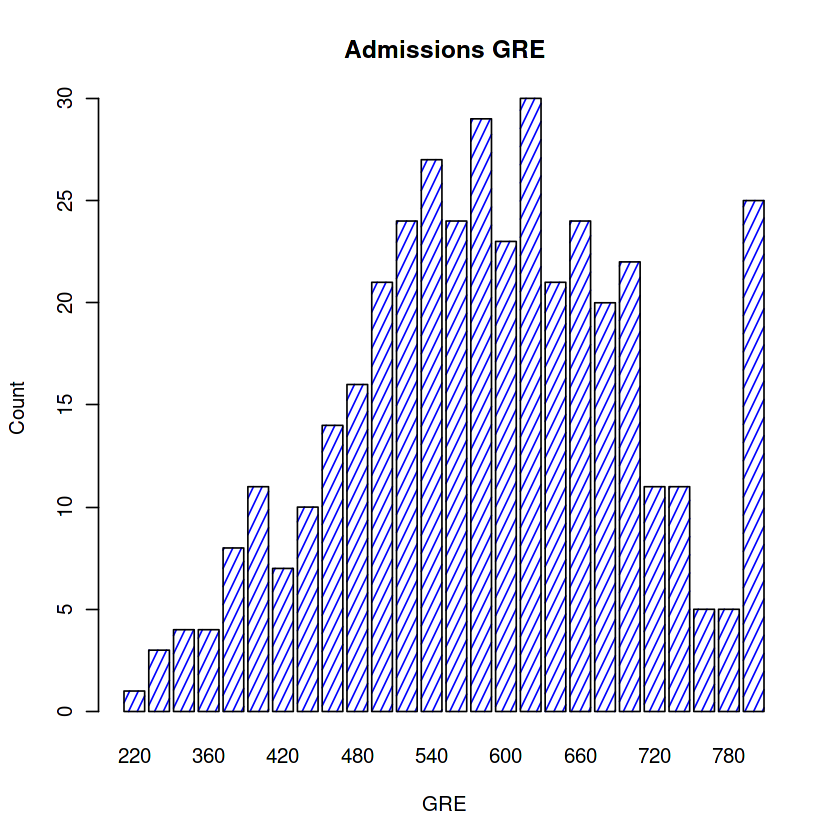

In [5]:
barplot(table(df$gre),
main="Admissions GRE",
xlab="GRE",
ylab="Count",
border="black",
col="blue",
density=10
)

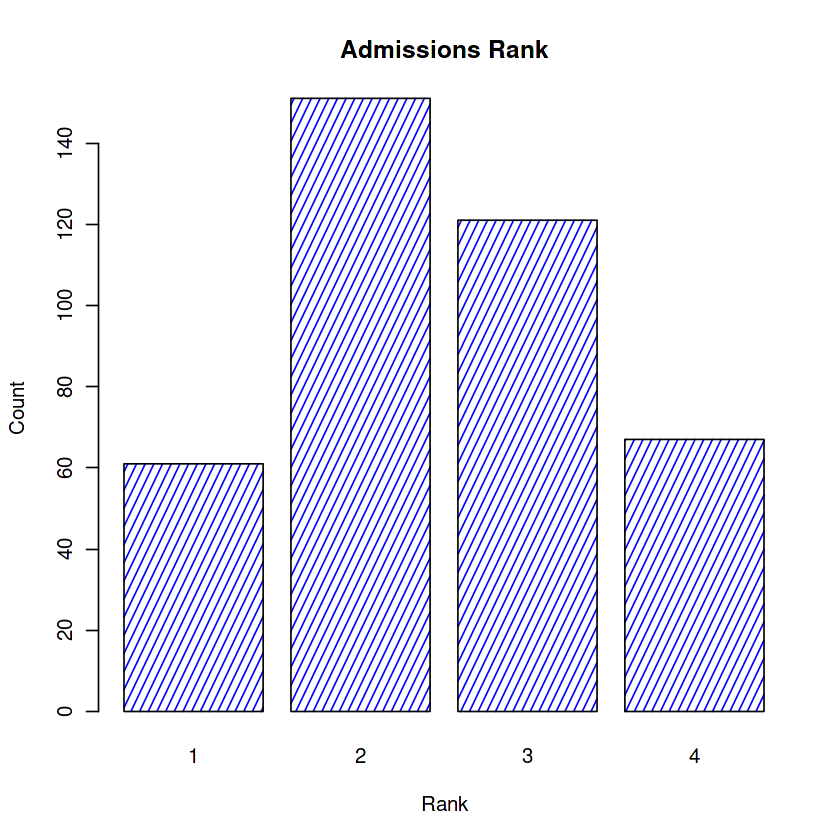

In [6]:
barplot(table(df$rank),
main="Admissions Rank",
xlab="Rank",
ylab="Count",
border="black",
col="blue",
density=10
)

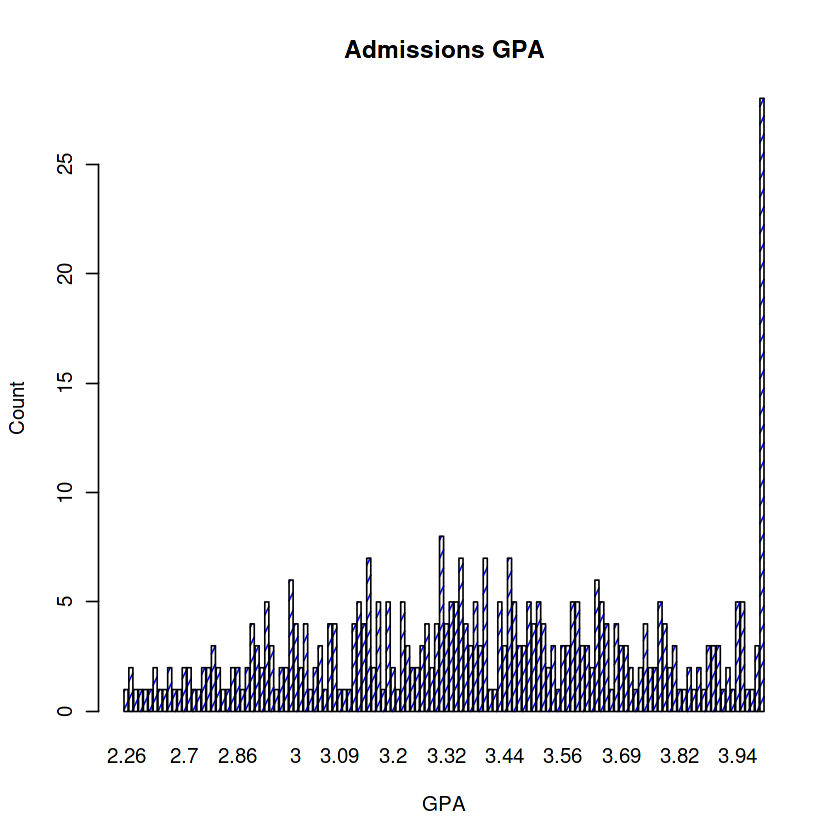

In [7]:
barplot(table(df$gpa),
main="Admissions GPA",
xlab="GPA",
ylab="Count",
border="black",
col="blue",
density=10
)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



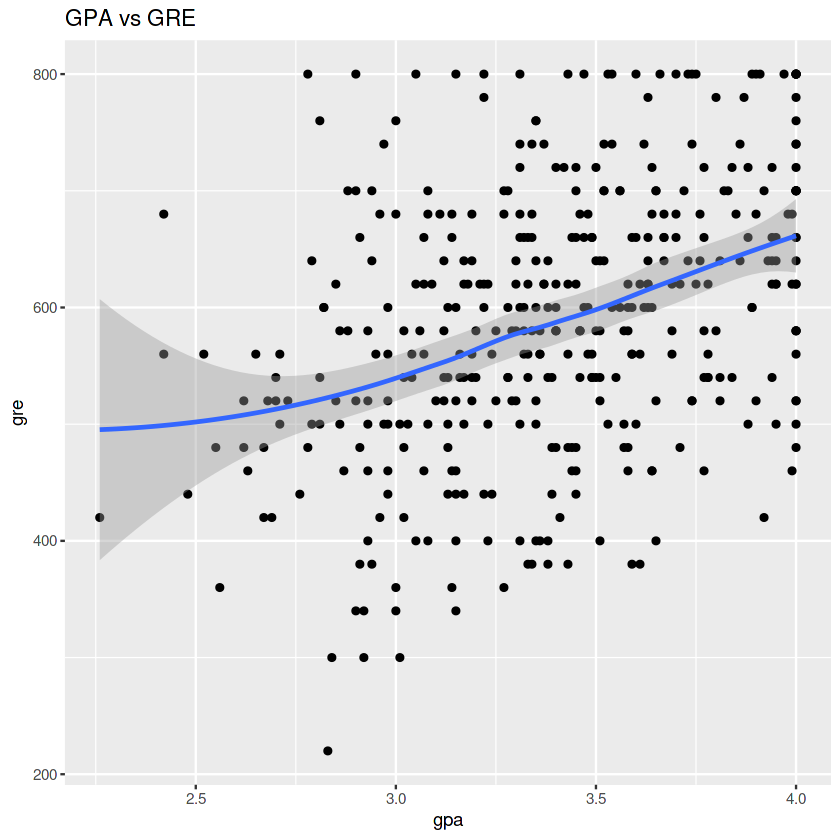

In [8]:
ggplot(df, aes(x=gpa, y=gre), color=cut)+ geom_point() + geom_smooth() + labs(title="GPA vs GRE")

In [9]:
xtabs(~admit + rank, data = df)

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

In [10]:
totalGRE<-sum(df$gre)
lenGRE<-length(df$gre)
paste(totalGRE/lenGRE, " is the average GRE score.")

accGRE=sum(df[which(df$admit=='1'), 2])
accGRElen=length(df[which(df$admit=='1'), 2])
accGRE=round(accGRE/accGRElen, digits = 4)
paste(accGRE, " is the average accepted GRE score.")

rejGRE=sum(df[which(df$admit=='0'), 2])
rejGRElen=length(df[which(df$admit=='0'), 2])
rejGRE=round(rejGRE/rejGRElen, digits = 4)
paste(rejGRE, " is the average rejected GRE score.")

[1] "587.7  is the average GRE score."

[1] "618.8976  is the average accepted GRE score."

[1] "573.1868  is the average rejected GRE score."

# Correlations

In [11]:
cor.test(df$admit, df$gre)


	Pearson's product-moment correlation

data:  df$admit and df$gre
t = 3.7437, df = 398, p-value = 0.0002081
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08797348 0.27746823
sample estimates:
      cor 
0.1844343 


In [12]:
cor.test(df$admit, df$gpa)


	Pearson's product-moment correlation

data:  df$admit and df$gpa
t = 3.6132, df = 398, p-value = 0.0003412
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08158617 0.27151944
sample estimates:
      cor 
0.1782123 


In [13]:
cor.test(df$admit, df$rank)


	Pearson's product-moment correlation

data:  df$admit and df$rank
t = -4.987, df = 398, p-value = 9.175e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3326548 -0.1479803
sample estimates:
       cor 
-0.2425132 


# Split Data

In [14]:
install.packages("caTools")       
library(caTools)
library(Metrics)

# Splitting data in train and test data
split <- sample.split(df, SplitRatio = 0.7)
split
  
train <- subset(df, split == "TRUE")
test <- subset(df, split == "FALSE")
head(train)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




[1] FALSE FALSE  TRUE  TRUE

,admit,gre,gpa,rank
,<dbl>,<dbl>,<dbl>,<dbl>
3,1,800,4.00,1
4,1,640,3.19,4
7,1,560,2.98,1
8,0,400,3.08,2
11,0,800,4.00,4
12,0,440,3.22,1


# Logistic Regression

In [15]:
#df$rank <- factor(df$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = df)
summary(mylogit)


Call:
glm(formula = admit ~ gre + gpa + rank, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6617  -0.3417  -0.1947   0.5061   0.9556  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1824127  0.2169695  -0.841   0.4010    
gre          0.0004424  0.0002101   2.106   0.0358 *  
gpa          0.1510402  0.0633854   2.383   0.0176 *  
rank        -0.1095019  0.0237617  -4.608 5.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1978669)

    Null deviance: 86.677  on 399  degrees of freedom
Residual deviance: 78.355  on 396  degrees of freedom
AIC: 493.07

Number of Fisher Scoring iterations: 2


In [16]:
# Log regression does have have R2
pscl::pR2(mylogit)["McFadden"]
#mylogit <- predict(mylogit, test) 

#logR2 = R2(mylogit, test$admit)
#logRMSE = RMSE(mylogit, test$admit)
#logMAE = mae(mylogit, test$admit)
#paste(logR2, " log r2")
#paste(logMAE, " log MAE" )

fitting null model for pseudo-r2


McFadden 
0.07713597

In [17]:
caret::varImp(mylogit)

,Overall
,<dbl>
gre,2.105952
gpa,2.382888
rank,4.608341


# Linear Regression
Linear regression is often not suitable for classification problems. However, I ran the results just to see how the results could compare to logistic and other supervised learning models.

In [18]:
linearMod <- lm(admit ~ gre + gpa + rank, data=train)  
summary(linearMod)
linearPred <- predict(linearMod, test) 


Call:
lm(formula = admit ~ gre + gpa + rank, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6620 -0.3498 -0.1646  0.4302  0.9594 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1012990  0.3160043  -0.321   0.7489    
gre          0.0005442  0.0003070   1.773   0.0778 .  
gpa          0.1362510  0.0912442   1.493   0.1370    
rank        -0.1408508  0.0323446  -4.355 2.15e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4424 on 196 degrees of freedom
Multiple R-squared:  0.1323,	Adjusted R-squared:  0.1191 
F-statistic: 9.966 on 3 and 196 DF,  p-value: 3.821e-06


In [19]:
# linear regression metrics:
lmR2 = R2(linearPred, test$admit)
lmRMSE = RMSE(linearPred, test$admit)
lmMAE = mae(linearPred, test$admit)
paste(lmR2, " linear r2")
paste(lmMAE, " linear MAE" )

[1] "0.063674173850432  linear r2"

[1] "0.396233886473667  linear MAE"

# Random Forest
Since there is a low amount of datapoints, random forest is a perfect predictive model. Because random forest does not overfit the model, it is often considered the most accurate supervised learning model. 

#### Tune Parameters

In [20]:
library(randomForest)
set.seed(120)  

forestMAE <- list()
forestR2  <- list()
forestDepth <- list()

for (x in 1:9) {
  classifier_RF = randomForest(x = train[-1],
                             y = train$admit,
                             ntree = 200,
                             maxdepth= x,
                            )
    #classifier_RF
    #print(classifier_RF)
    y_pred = predict(classifier_RF, newdata = test[-1])
    
    fR2 = R2(y_pred, test$admit)
    fRMSE = RMSE(y_pred, test$admit)
    fMAE = mae(y_pred, test$admit)
    
    forestMAE <- append(forestMAE, fMAE)
    forestR2 <- append(forestR2, fR2)
    forestDepth <- append(forestDepth, x)
}
#paste(forestMAE)
#paste(forestR2)
#paste(forestDepth)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




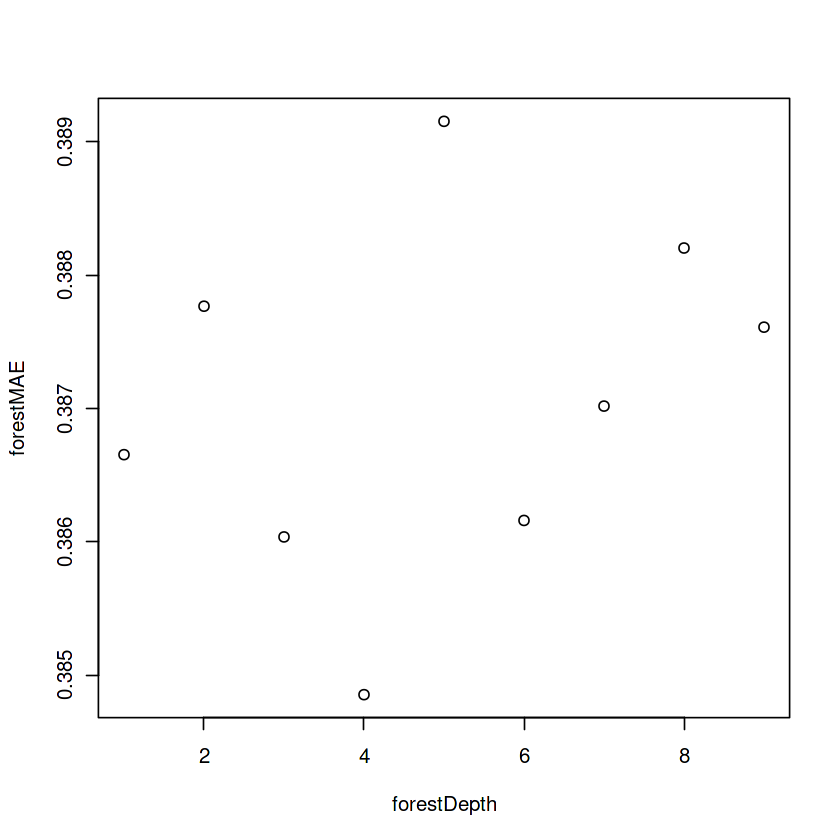

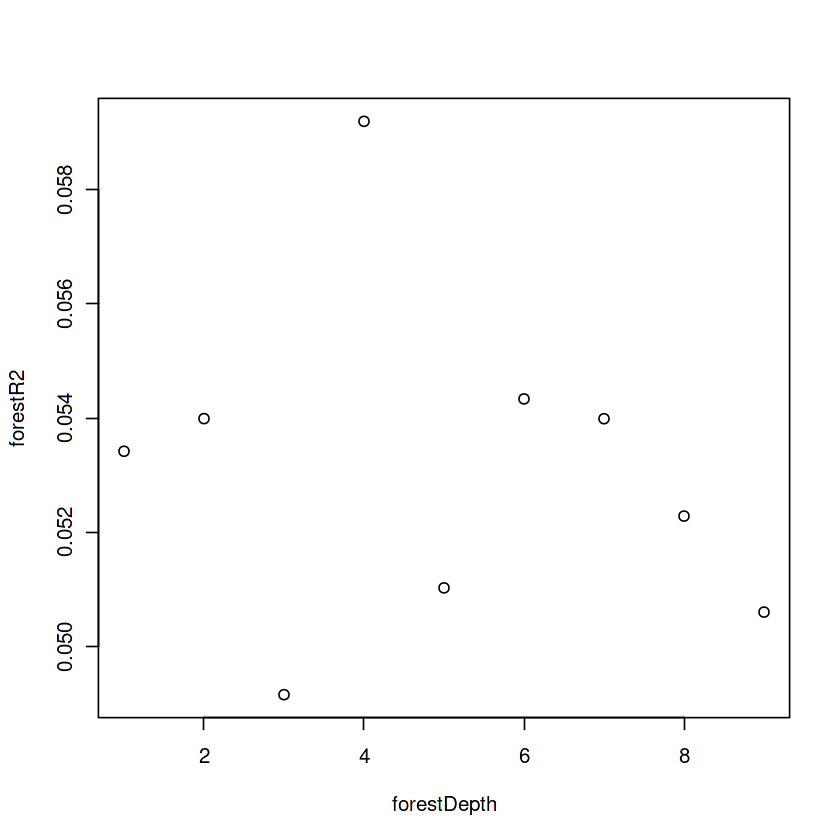

In [21]:
# Three for max depth seems to provide the least amount of MAE while providing a descent R2.
plot(forestDepth, forestMAE)
plot(forestDepth, forestR2)

In [22]:
forestMAE <- list()
forestR2  <- list()
forestTrees <- list(2, 5, 10, 50, 100, 200, 300, 400, 500)

for (tree in forestTrees) {
  classifier_RF = randomForest(x = train[-1],
                             y = train$admit,
                             ntree = tree,
                             maxdepth= 3,
                            )
    #classifier_RF
    #print(classifier_RF)
    y_pred = predict(classifier_RF, newdata = test[-1])
    
    fR2 = R2(y_pred, test$admit)
    fRMSE = RMSE(y_pred, test$admit)
    fMAE = mae(y_pred, test$admit)
    
    forestMAE <- append(forestMAE, fMAE)
    forestR2 <- append(forestR2, fR2)
    forestDepth <- append(forestDepth, tree)
}


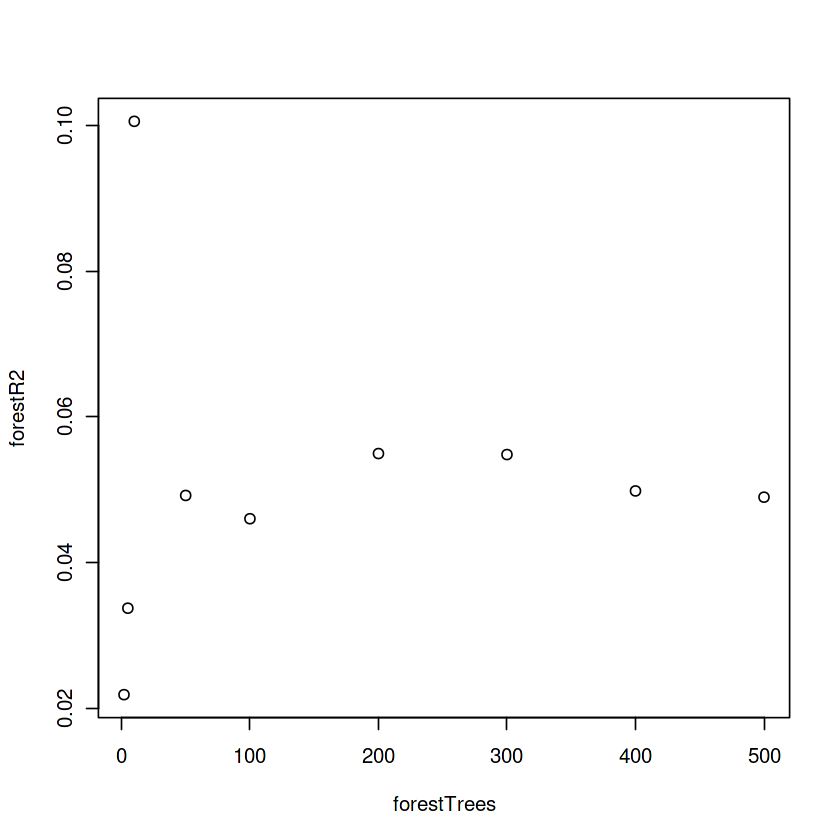

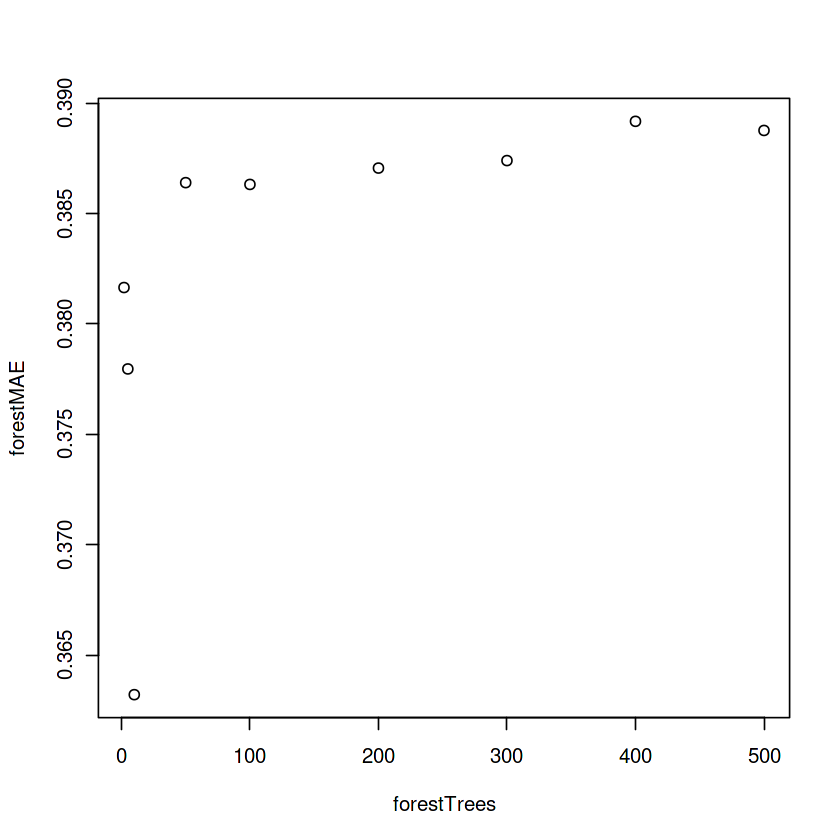

In [23]:
# 500 provides the best nTrees with least amount of error and high accuracy:
plot(forestTrees, forestR2)
plot(forestTrees, forestMAE)

#### Final Forest Prediction

In [24]:
# Fitting Random Forest to the train dataset
classifier_RF = randomForest(x = train[-1],
                             y = train$admit,
                             ntree = 500,
                             maxdepth= 3,
                            )
classifier_RF


Call:
 randomForest(x = train[-1], y = train$admit, ntree = 500, maxdepth = 3) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.2122441
                    % Var explained: 4.01

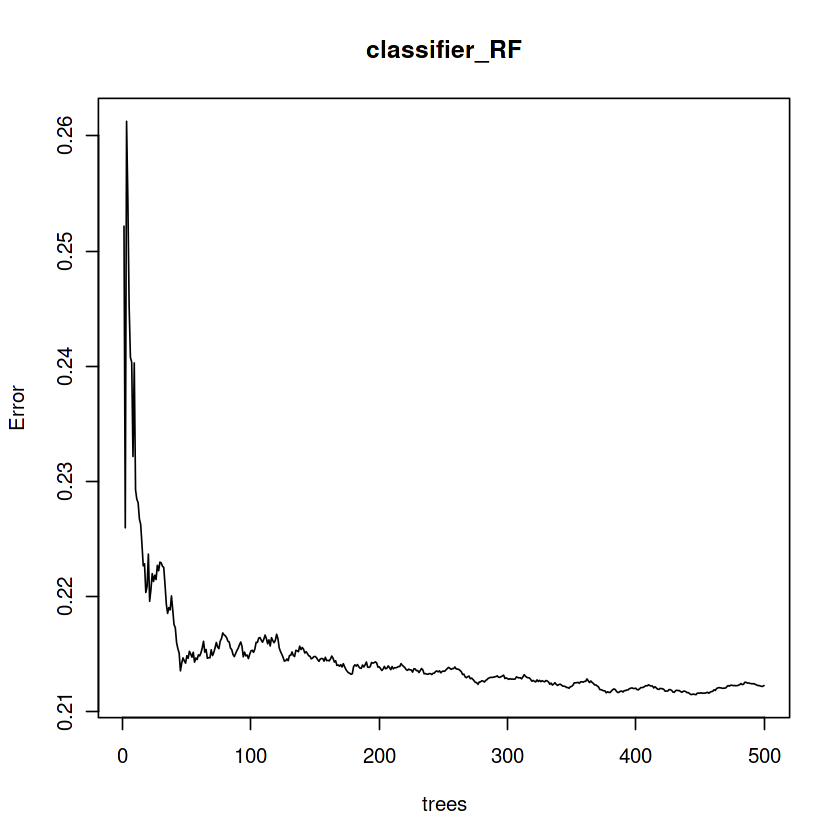

In [25]:
# Predicting the Test results:
y_pred = predict(classifier_RF, newdata = test[-1])
confusion_mtx = table(test[, 3], y_pred)

# Plotting model
plot(classifier_RF)

#### Importance Features

,IncNodePurity
gre,7.958965
gpa,11.300591
rank,6.369003


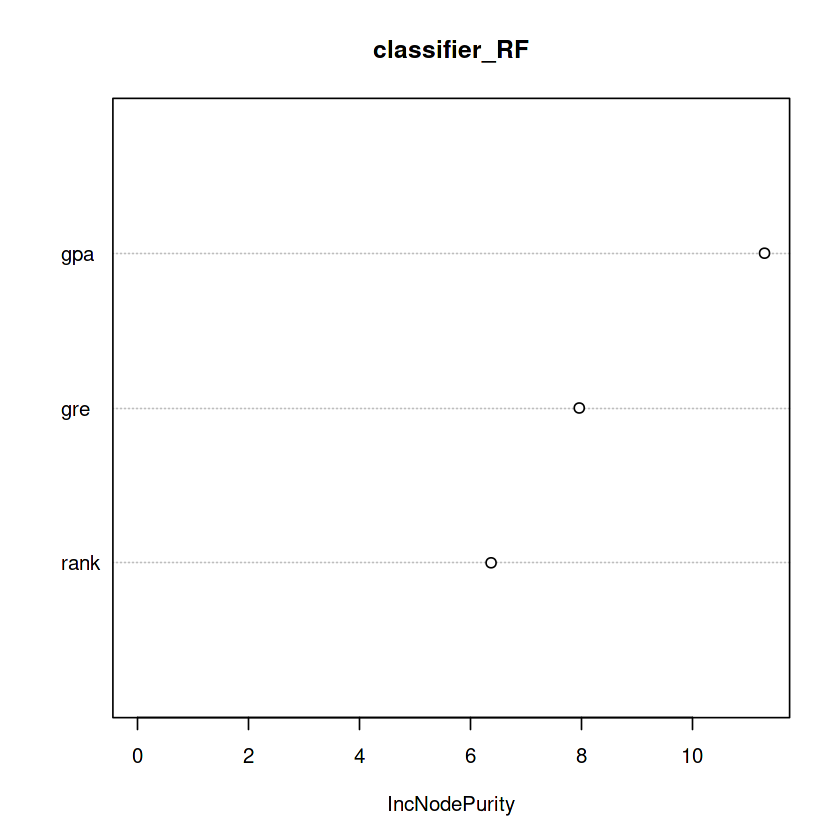

In [26]:
importance(classifier_RF)
varImpPlot(classifier_RF)

In [27]:
# random forest metrics:
forestR2 = R2(y_pred, test$admit)
forestRMSE = RMSE(y_pred, test$admit)
forestMAE = mae(y_pred, test$admit)
paste(forestR2, " forest r2")
paste(forestMAE, " forest MAE" )

[1] "0.0518765085643496  forest r2"

[1] "0.388641277419722  forest MAE"

# Decision Tree

In [28]:
library(rpart)
library(rpart.plot)
library(pROC)
library(tree)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:Metrics’:

    auc


The following objects are masked from ‘package:stats’:

    cov, smooth, var




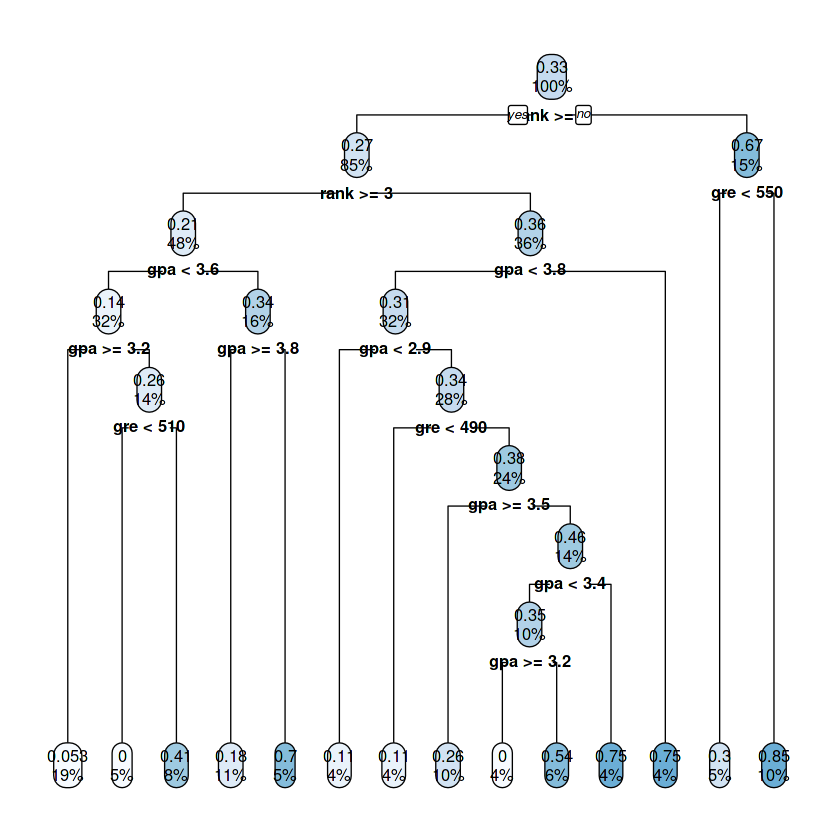

In [29]:
tree <- rpart(admit ~., data = train)
rpart.plot(tree)

# Future Admissions
The testAdmit file is for potential future students who have not been accepted or rejected yet. The students will be accepted by use of the previous year acceptance data.

In [30]:
testDF='../input/testadmit/testAdmit.xlsx'
testDF= read.xlsx(testDF, 1, header=TRUE)
head(testDF)

,gre,gpa,rank
,<dbl>,<dbl>,<dbl>
1,598,3.61,3
2,437,3.67,3
3,332,4.00,1
4,693,3.19,4
5,658,2.93,4
6,408,3.00,2


# Final Prediction of New Data

In [31]:
y_pred = predict(classifier_RF, newdata = testDF)
y_pred

1          2          3          4          5          6          7 
0.20817946 0.39326035 0.49977171 0.26357021 0.51928598 0.17918098 0.31358620 
         8          9         10         11         12         13         14 
0.16035530 0.09407192 0.39032195 0.17751663 0.46570244 0.49402019 0.41135331 
        15         16         17         18         19         20         21 
0.49514314 0.13899431 0.40026631 0.39432081 0.40401554 0.54396557 0.36598471 
        22         23         24         25         26         27         28 
0.26697096 0.18762382 0.12134653 0.20581046 0.49120572 0.47503884 0.36508191 
        29         30         31         32         33         34         35 
0.20000219 0.17172943 0.18575505 0.06629913 0.04066852 0.42927730 0.27630105 
        36         37         38         39         40         41         42 
0.42929232 0.37145187 0.60311801 0.24068641 0.39185754 0.35554891 0.16873736 
        43         44         45         46         47         48         49 
0.44037991 0.05846302 0.47942947 0.09070565 0.30375481 0.46025571 0.24612670

In [32]:
newDF <- data.frame(y_pred)
head(newDF)

,y_pred
,<dbl>
1,0.2081795
2,0.3932603
3,0.4997717
4,0.2635702
5,0.5192860
6,0.1791810


# New Excel Result

In [33]:
newFile="results.xlsx"
#fwrite(df, newFile)
paste("New File Created")
write.xlsx(newDF, newFile, sheetName = "new")

[1] "New File Created"